In [1]:
from utils import ActionGenerator
from utils.plot_regret import plot_regret 
from utils.Play import play 
from utils.Experiment import experiment
from Agents.UCB import UCB
from Agents.RB_agent import RegretBalancingAgent
from environments.BanditEnv import BanditEnv
from environments.BernoulliBanditEnv import BernoulliBanditEnv
from kaggle_environments import make, evaluate
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from Agents.EpsilonGreedy import EpsilonGreedy
np.random.seed(1306)

# Regret Balancing for Bandits : Experience 1 

/Users/augustincablant/Documents/GitHub/Advanced-ML/src/utils/plot_regret.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  reg_plot.show()


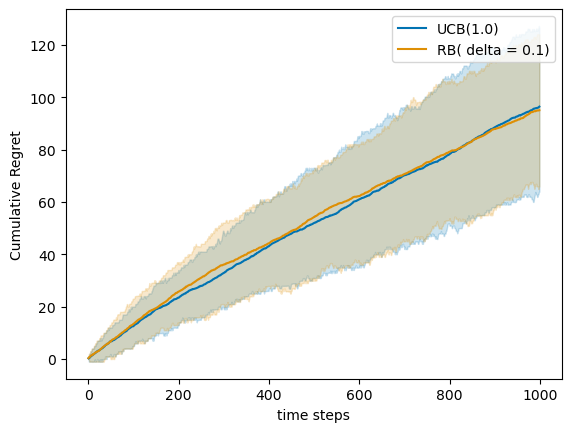

In [5]:
n_arms = 4
means = [0.1, 0.2, 0.3, 0.4]
n_rounds = 1000
delta = 0.1
env = BernoulliBanditEnv(means = means)
ucb_agent = UCB(K = len(means), var = 1.0)
rb_agent = RegretBalancingAgent(K = len(means), delta = delta)
Nmc = 100  # Number of Monte Carlo simulations
T = 1000  # Number of rounds
agents = [ucb_agent, rb_agent]
all_data = experiment(env, agents, Nmc, T)
# Plot results
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10)

# Regret Balancing for Bandits : Experience 2 (Optimizing the Exploration Rate)

/Users/augustincablant/Documents/GitHub/Advanced-ML/src/utils/plot_regret.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  reg_plot.show()


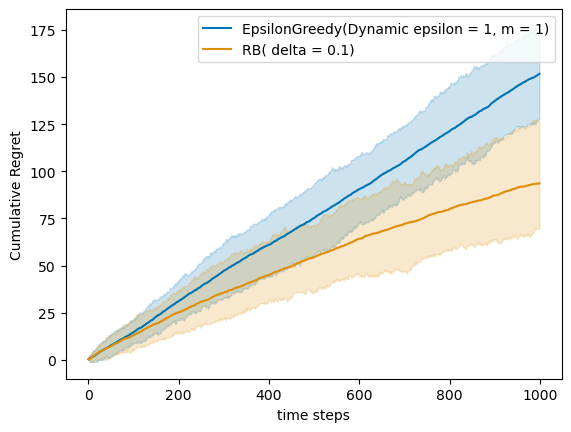

In [7]:
base_algorithms = [EpsilonGreedy(K=len(means), eps = 2 ** (-i), FixedEpsilon = True, m = 1) for i in range(1, 19)]

delta = 0.1  # Confidence level for regret balancing
rb_agent = RegretBalancingAgent(K = len(means), delta = delta)

# Experiment
algorithms = base_algorithms + [rb_agent]
all_data = experiment(env, algorithms, Nmc, T)

# Plotting results
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10)